In [132]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:
data = pd.read_csv("/Users/mariabaranova/Desktop/DS/Level_up_CourseDS/Autism_Data.csv")

In [134]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [135]:
data.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [136]:
data.shape

(704, 21)

In [137]:
data = data.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res', 'Class/ASD':'ASD'}, errors="raise")

In [138]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
dtype: int64

In [139]:
data.loc[data["ASD"]== 'NO', "ASD"]=0
data.loc[data["ASD"]=='YES', "ASD"]=1
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,0
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,0


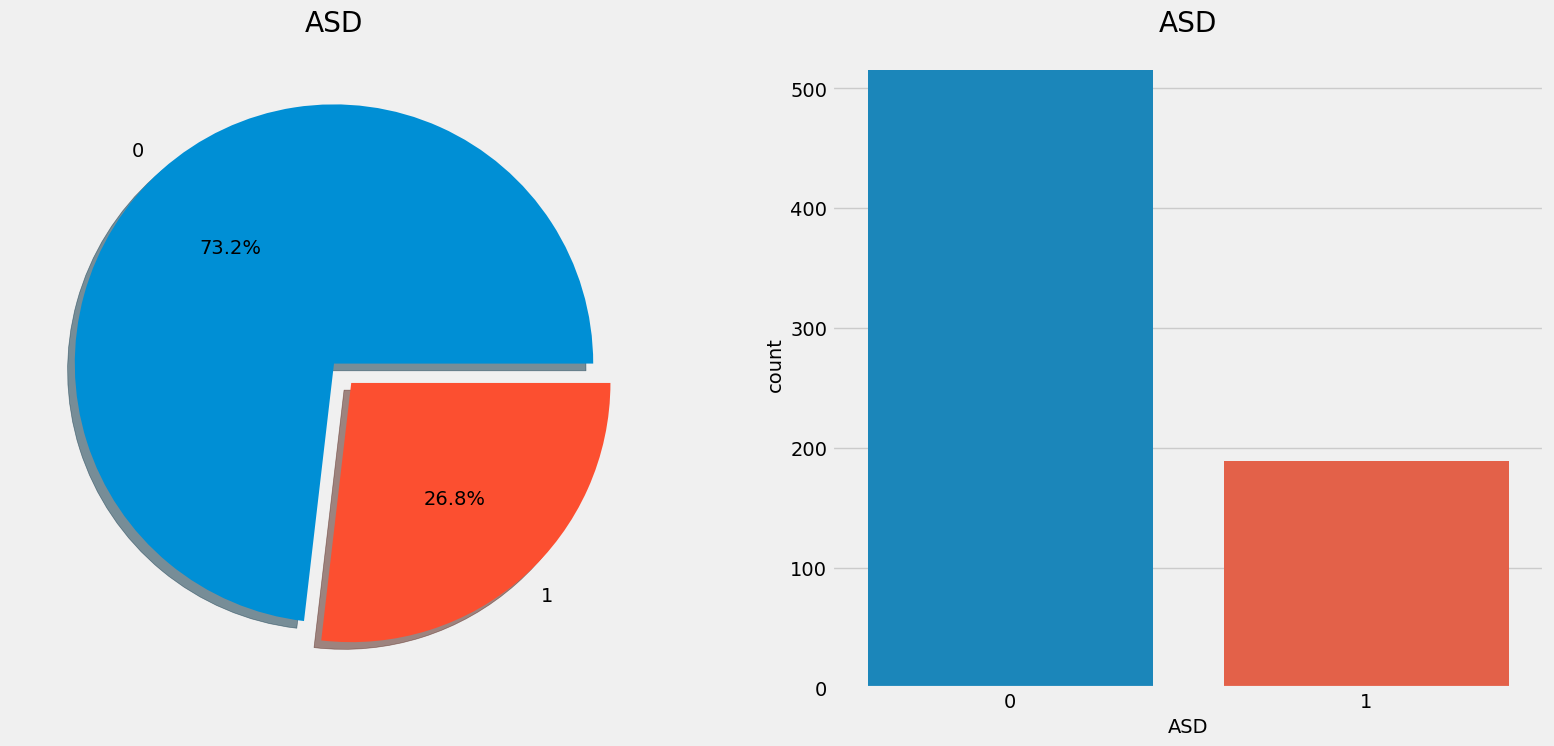

In [140]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['ASD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('ASD')
ax[0].set_ylabel('')
sns.countplot(x='ASD',data=data,ax=ax[1])
ax[1].set_title('ASD')
plt.show()

На графике можно увидеть, что в представленных данных присутствует дисбаланс классов, у большей части исследованных диагноз аутизм отсутствует.

In [141]:
data['gender'].value_counts()

m    367
f    337
Name: gender, dtype: int64

In [142]:
data.groupby(['gender', "ASD"])['ASD'].count()

gender  ASD
f       0      234
        1      103
m       0      281
        1       86
Name: ASD, dtype: int64

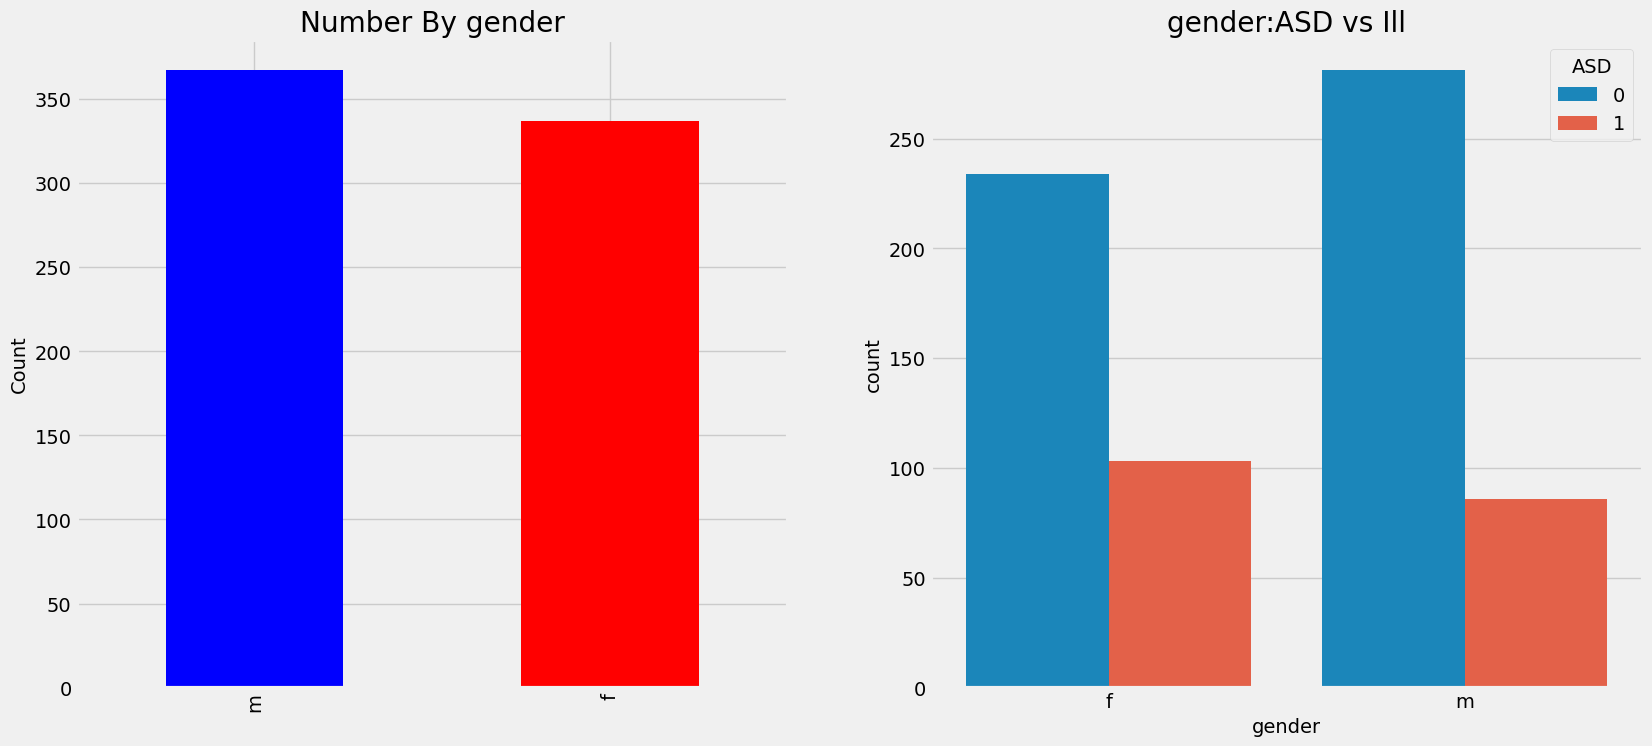

In [143]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['gender'].value_counts().plot.bar(color=['blue','red'],ax=ax[0])
ax[0].set_title('Number By gender')
ax[0].set_ylabel('Count')
sns.countplot(x='gender',hue='ASD',data=data,ax=ax[1])
ax[1].set_title('gender:ASD vs Ill')
plt.show()

В выборке небольшое преобладание мужчин, но среди имеющих болезнь преобладают женщины. 

In [144]:
data.groupby(['ethnicity', "ASD"])['ASD'].count()

ethnicity          ASD
'Middle Eastern '  0       84
                   1        8
'South Asian'      0       33
                   1        3
?                  0       86
                   1        9
Asian              0      107
                   1       16
Black              0       25
                   1       18
Hispanic           0        8
                   1        5
Latino             0       10
                   1       10
Others             0       21
                   1        9
Pasifika           0       11
                   1        1
Turkish            0        5
                   1        1
White-European     0      124
                   1      109
others             0        1
Name: ASD, dtype: int64

In [152]:
data.loc[data["ethnicity"] == "?", "ethnicity"]='Others'
data.loc[data["ethnicity"] == "others", "ethnicity"]='Others'

In [153]:
data.groupby(['ethnicity', "ASD"])['ASD'].count()

ethnicity          ASD
'Middle Eastern '  0       84
                   1        8
'South Asian'      0       33
                   1        3
Asian              0      107
                   1       16
Black              0       25
                   1       18
Hispanic           0        8
                   1        5
Latino             0       10
                   1       10
Others             0      108
                   1       18
Pasifika           0       11
                   1        1
Turkish            0        5
                   1        1
White-European     0      124
                   1      109
Name: ASD, dtype: int64

In [154]:
pd.crosstab(data.ethnicity, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
ethnicity,,
'Middle Eastern ',84,8
'South Asian',33,3
Asian,107,16
Black,25,18
Hispanic,8,5
Latino,10,10
Others,108,18
Pasifika,11,1
Turkish,5,1


По этнической принадлежности среди исследуемых значительно преобладают белые европейцы, как в целом во всей выборке, так и в группах имеющих и неимеющих дигноз. 

In [155]:
data.groupby(['age', "ASD"])['ASD'].count()

age  ASD
17   0      13
     1       5
18   0      25
     1       6
19   0      27
            ..
60   1       1
61   0       1
     1       1
64   0       1
?    0       2
Name: ASD, Length: 83, dtype: int64

In [156]:
#delete age ?
data = data[data.age != '?']

In [157]:
data['age'].min()

'17'

In [158]:
data['age'].max()

'64'

In [162]:
data.groupby(['age_desc', "ASD"])['ASD'].count()

age_desc       ASD
'18 and more'  0      513
               1      189
Name: ASD, dtype: int64

In [163]:
data.drop(["age_desc",], axis=1, inplace=True)

In [164]:
data['age']=data['age'].astype(float)

In [165]:
#age groups
data['age_group'] = 0
data.loc[data["age"]<18, "age_group"]=0
data.loc[(data["age"]>=18)&(data["age"]<35), "age_group"]=1
data.loc[(data["age"]>=35)&(data["age"]<60), "age_group"]=2
data.loc[data["age"]>=60, "age_group"]=3
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country_of_res,used_app_before,result,relation,ASD,age_group
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,Self,0,1
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,Self,0,1
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,Parent,1,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,Self,0,2
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,no,no,Egypt,no,2,?,0,2


In [166]:
data.drop(['age'], axis=1, inplace=True)

In [168]:
pd.crosstab(data.age_group, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
age_group,,
0,13,5
1,385,118
2,112,64
3,3,2


В выборке в целом и в группах по наличию диагноза преобладают люди молодого возраста : 18-35 лет.

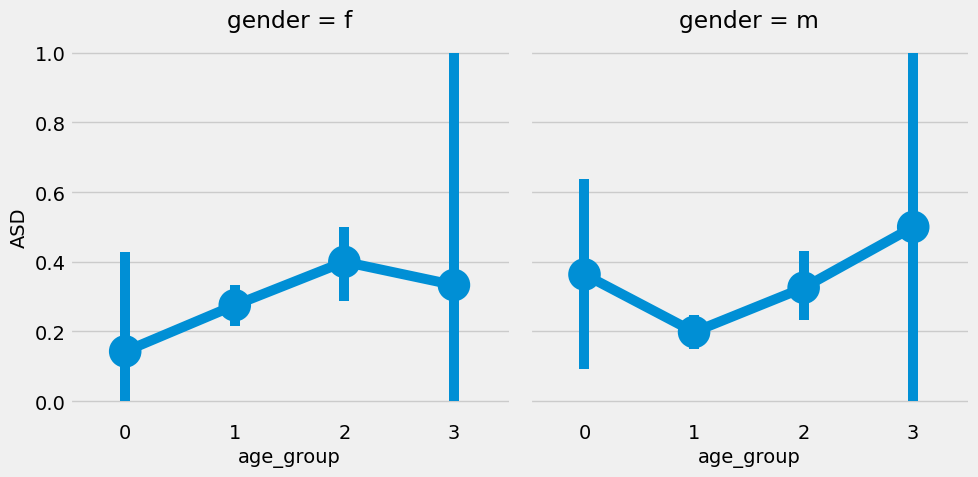

In [169]:
sns.catplot(x="age_group", y="ASD", data=data, col="gender", kind='point')
plt.show()

В возрастной группе до 18 лет и старше 60 лет среди имеющих диагноз больше мужчин, а в группах 18-34 лет и 35-59  - женщин.

In [173]:
pd.crosstab(data.jundice, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
jundice,,
no,472,161
yes,41,28


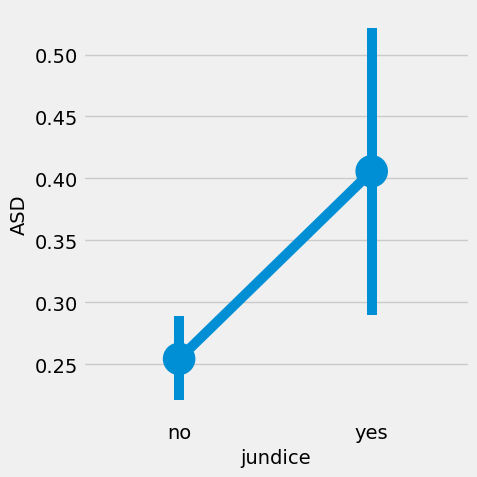

In [183]:
sns.catplot(x="jundice", y="ASD", data=data, kind='point')
plt.show()

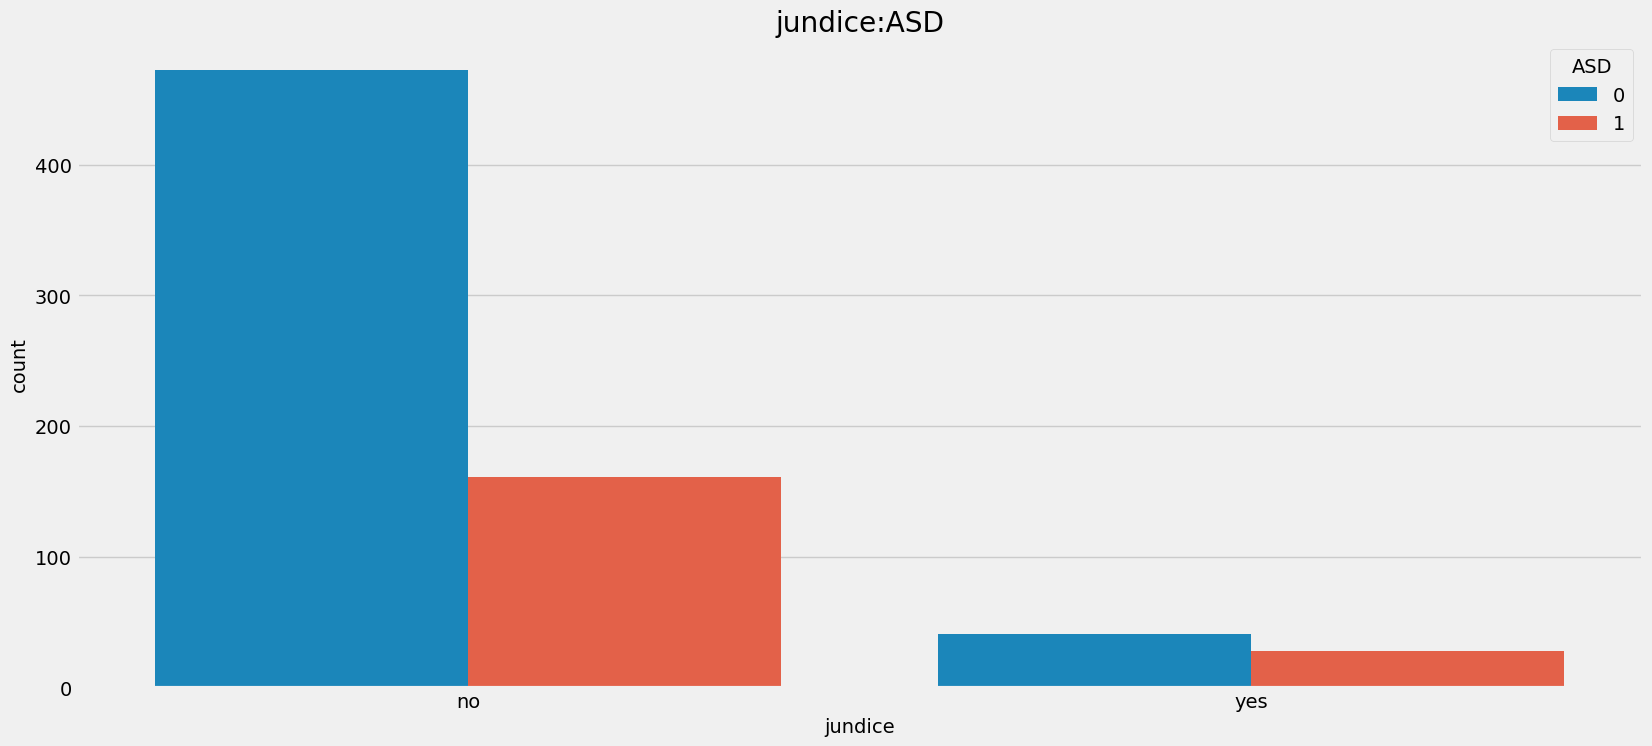

In [182]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot(x='jundice',hue='ASD',data=data)
ax.set_title('jundice:ASD')
plt.show()

В выборке в целом и в каждой группе по наличию диагноза преобладают люди без желтухи при рождении. Среди имеющих желтуху относительное преобладание людей, с диагнозом аутизм ( отношение количества пациентов с диагнозом и без выше среди тех, у кого была желтуха при рождении)

In [184]:
data.groupby(['autism', "ASD"])['ASD'].count()

autism  ASD
no      0      465
        1      146
yes     0       48
        1       43
Name: ASD, dtype: int64

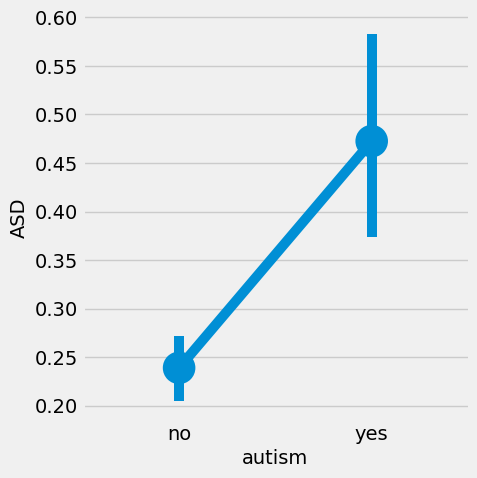

In [185]:
sns.catplot(x="autism", y="ASD", data=data, kind='point')
plt.show()

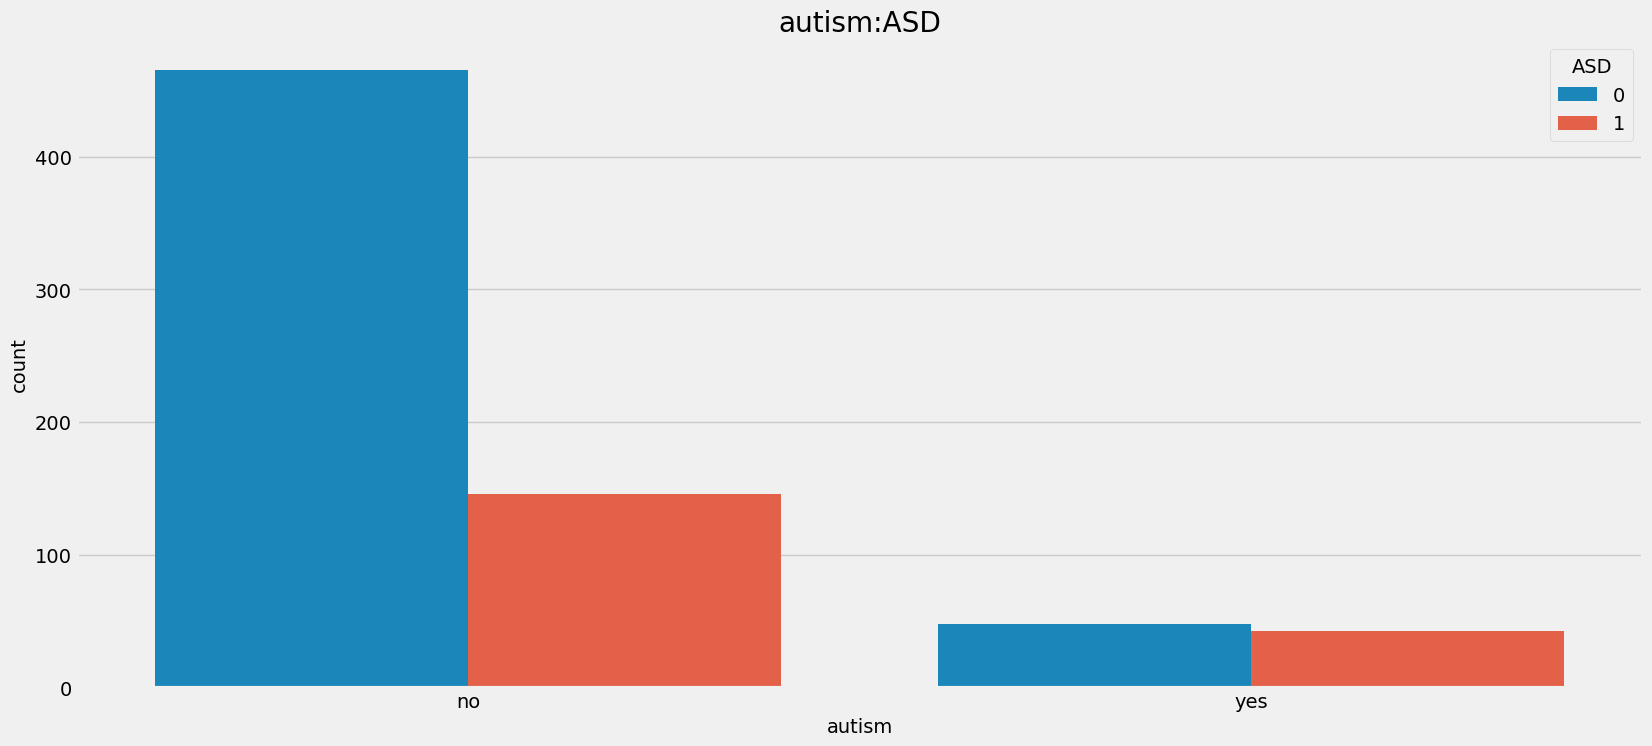

In [186]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot(x='autism',hue='ASD',data=data)
ax.set_title('autism:ASD')
plt.show()

В выборке преобладают люди, родственники которых дигноз не имеют. Но можно отметить явное отличие в соотношении имеющих и не имеющих диагноз в группах по родственникам: если в семье есть кто-то с атуизмом то вероятность дианостирования аутизма выше.

In [191]:
data.groupby(['country_of_res', "ASD"])['ASD'].count()

country_of_res    ASD
'Costa Rica'      0       1
'Czech Republic'  0       1
'Hong Kong'       0       1
'New Zealand'     0      66
                  1      15
                         ..
Sweden            1       2
Tonga             0       1
Turkey            0       1
Ukraine           0       2
Uruguay           1       1
Name: ASD, Length: 96, dtype: int64

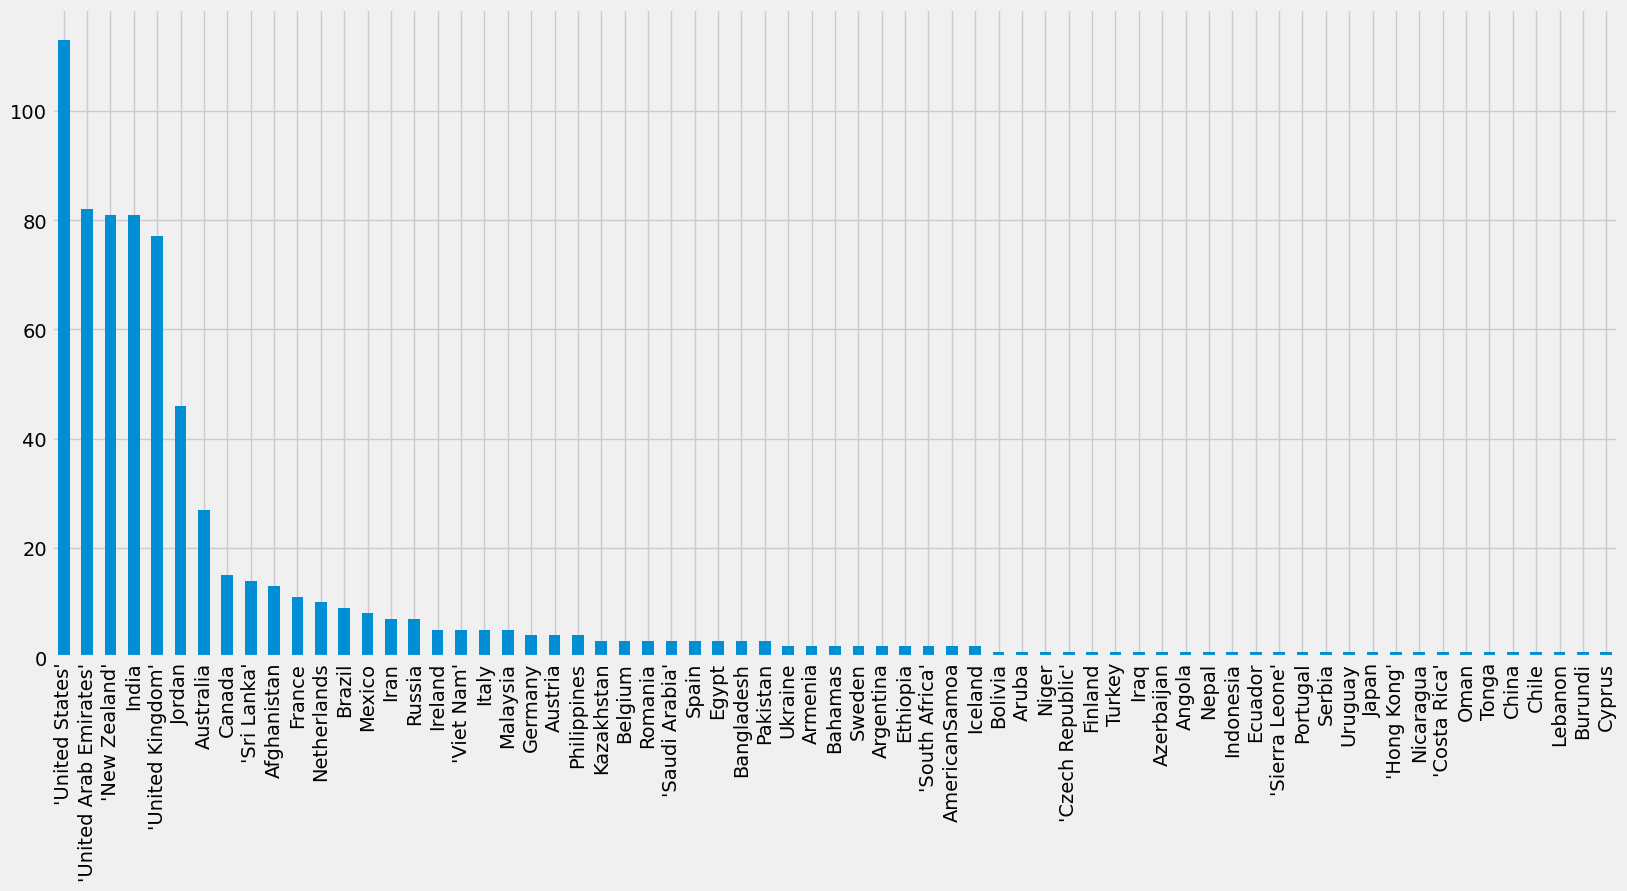

In [192]:
f,ax=plt.subplots(figsize=(18,8))
data['country_of_res'].value_counts().plot.bar()

plt.show()

В выборке преобладают пациенты ( по убыванию) из США, ОАЭ, Новой Зеландии, Индии, Великобритании, Иордании, Австралии.

In [194]:
data.groupby(['used_app_before', "ASD"])['ASD'].count()

used_app_before  ASD
no               0      506
                 1      184
yes              0        7
                 1        5
Name: ASD, dtype: int64

Большинство из исследуемых выполняли тест впервые. 

In [195]:
data.groupby(['relation', "ASD"])['ASD'].count()

relation                    ASD
'Health care professional'  0        3
                            1        1
?                           0       84
                            1        9
Others                      0        4
                            1        1
Parent                      0       38
                            1       12
Relative                    0       19
                            1        9
Self                        0      365
                            1      157
Name: ASD, dtype: int64

In [196]:
data.loc[data["relation"] == "?", "relation"]='Others'

In [197]:
pd.crosstab(data.relation, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
relation,,
'Health care professional',3,1
Others,88,10
Parent,38,12
Relative,19,9
Self,365,157


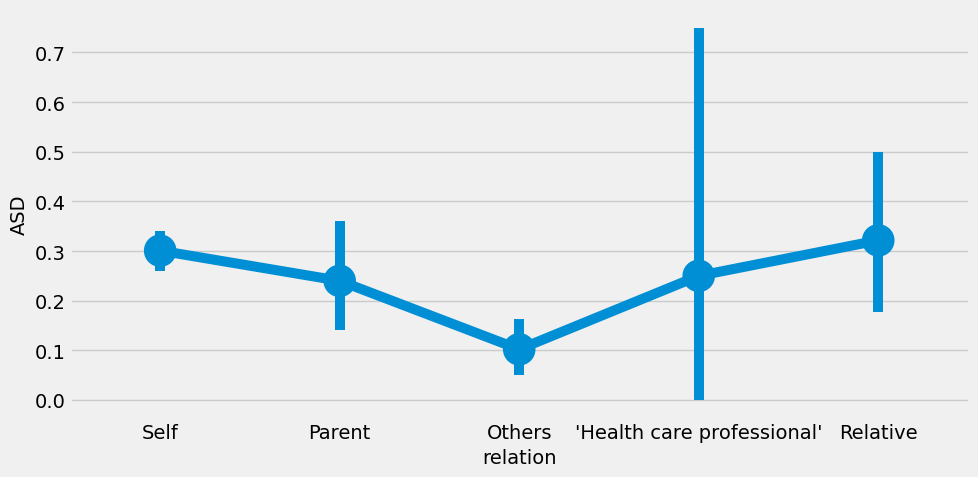

In [199]:
sns.catplot(x="relation", y="ASD", data=data, kind='point', height=5, aspect=2)
plt.show()

Большинство из исследуемых выполняли тестирование самостоятельно, процент выявления среди тех, у кого неизвестно кто выполнял тест, ниже.

In [200]:
data.groupby(['result', "ASD"])['ASD'].count()

result  ASD
0       0       13
1       0       33
2       0       74
3       0      110
4       0      130
5       0       83
6       0       70
7       1       57
8       1       55
9       1       47
10      1       30
Name: ASD, dtype: int64

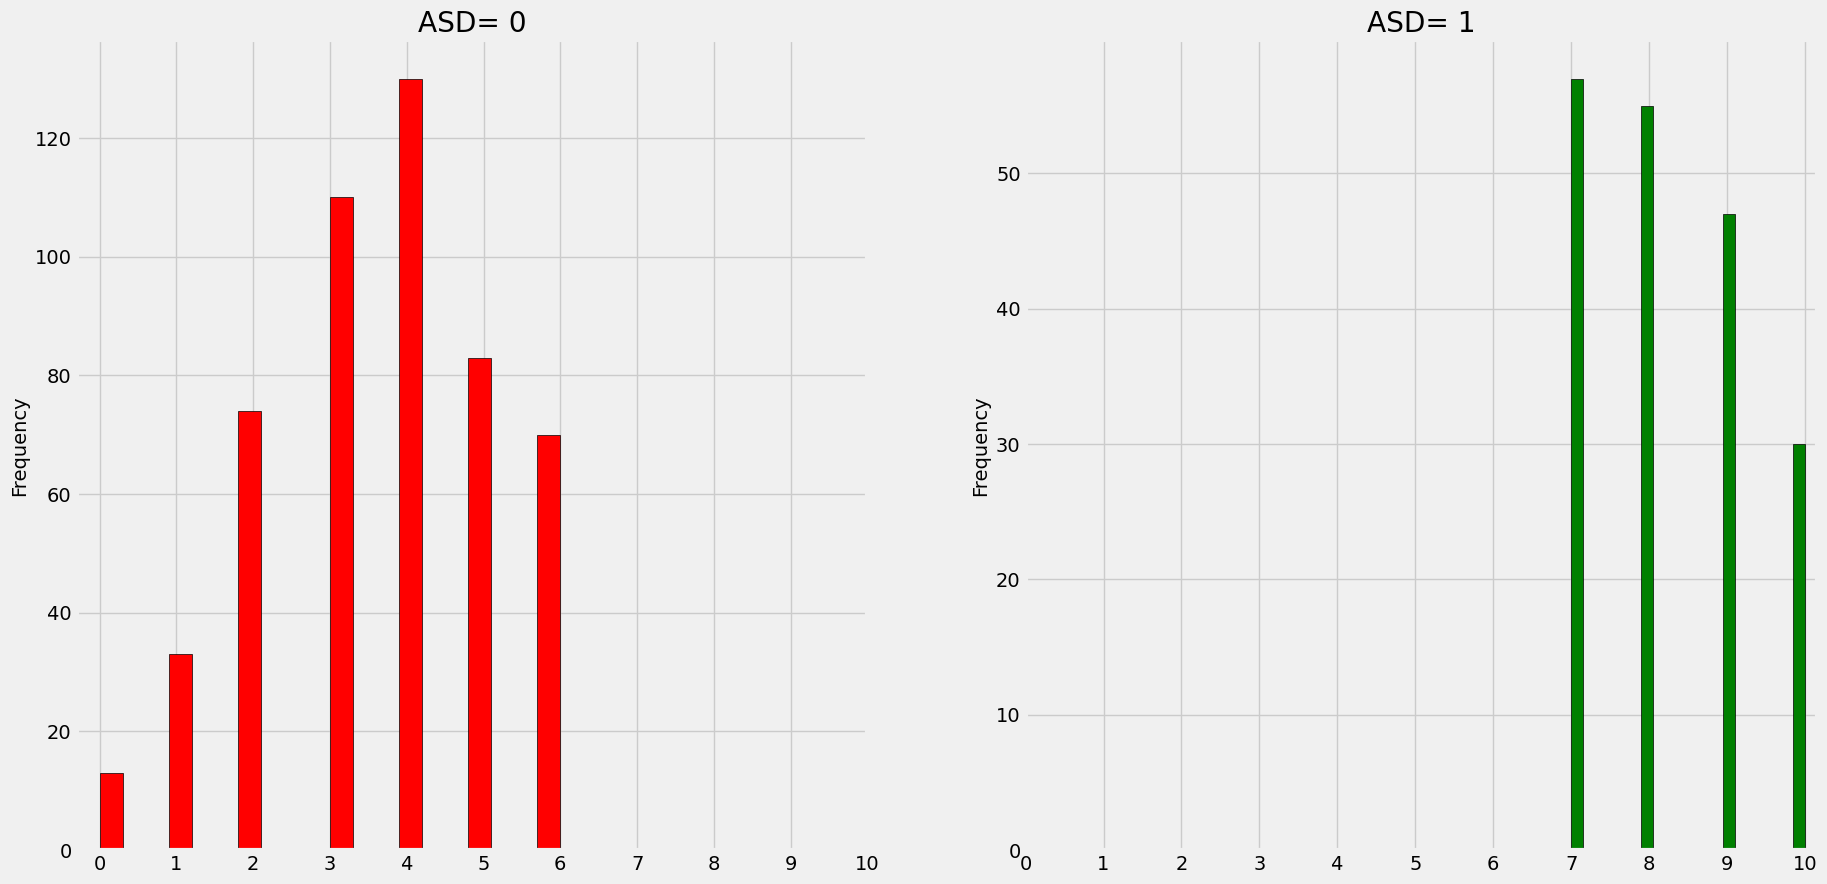

In [202]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['ASD']==0].result.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('ASD= 0')
x1=list(range(0,11,1))
ax[0].set_xticks(x1)
data[data['ASD']==1].result.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('ASD= 1')
x2=list(range(0,11,1))
ax[1].set_xticks(x2)
plt.show()

По графику явно видно, что все исследуемые без диагноза имеют суммарный результат по 10 признакам в интервале от 1 до 6, большинство - 4. Исследуемые с диагнозом имеют результат от 7 до 10, большинство 7.

In [203]:
pd.crosstab(data.A1_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A1_Score,,
0,183,11
1,330,178


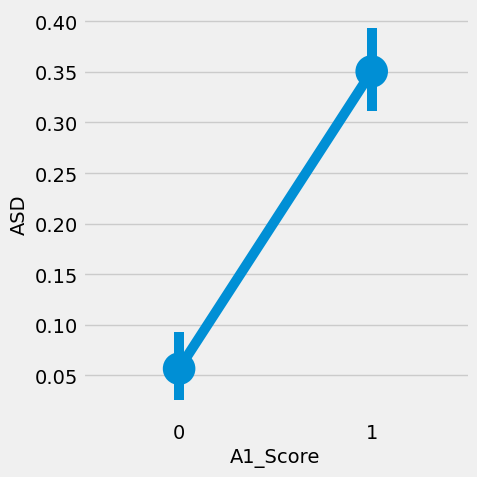

In [209]:
sns.catplot(x="A1_Score", y="ASD", data=data, kind='point')
plt.show()

In [205]:
pd.crosstab(data.A2_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A2_Score,,
0,329,55
1,184,134


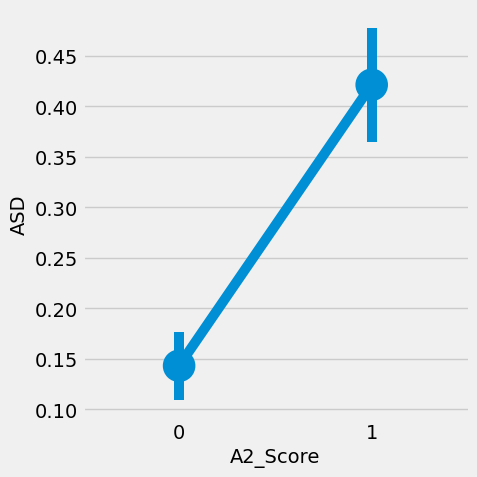

In [210]:
sns.catplot(x="A2_Score", y="ASD", data=data, kind='point')
plt.show()

In [207]:
pd.crosstab(data.A3_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A3_Score,,
0,346,34
1,167,155


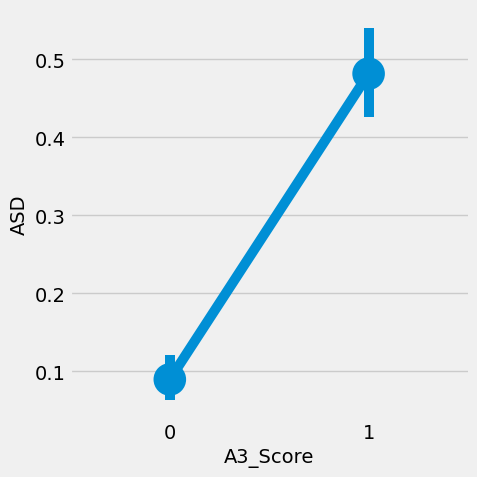

In [212]:
sns.catplot(x="A3_Score", y="ASD", data=data, kind='point')
plt.show()

In [213]:
pd.crosstab(data.A4_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A4_Score,,
0,331,22
1,182,167


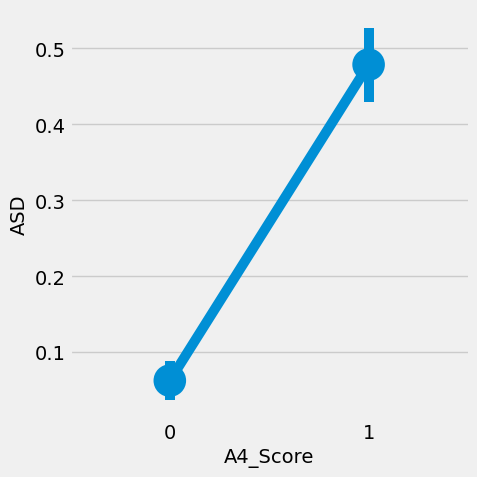

In [214]:
sns.catplot(x="A4_Score", y="ASD", data=data, kind='point')
plt.show()

In [95]:
pd.crosstab(data.A5_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD_int,0,1
A5_Score,,
0,341,11
1,172,178


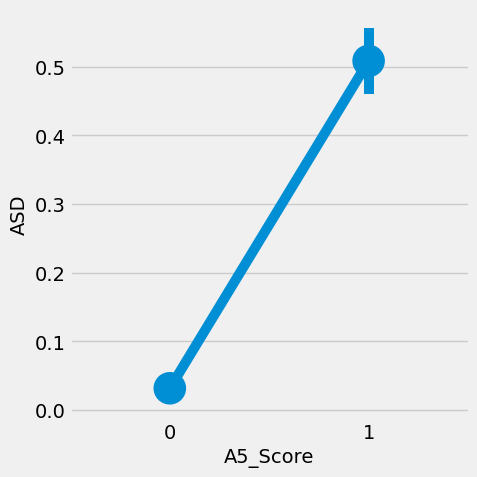

In [215]:
sns.catplot(x="A5_Score", y="ASD", data=data, kind='point')
plt.show()

In [96]:
pd.crosstab(data.A6_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD_int,0,1
A6_Score,,
0,450,52
1,63,137


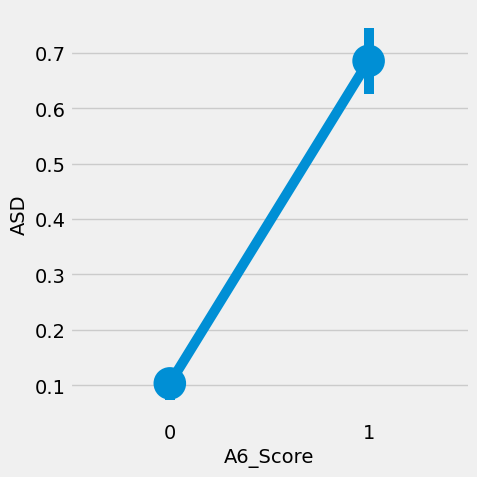

In [216]:
sns.catplot(x="A6_Score", y="ASD", data=data, kind='point')
plt.show()

In [217]:
pd.crosstab(data.A7_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A7_Score,,
0,353,56
1,160,133


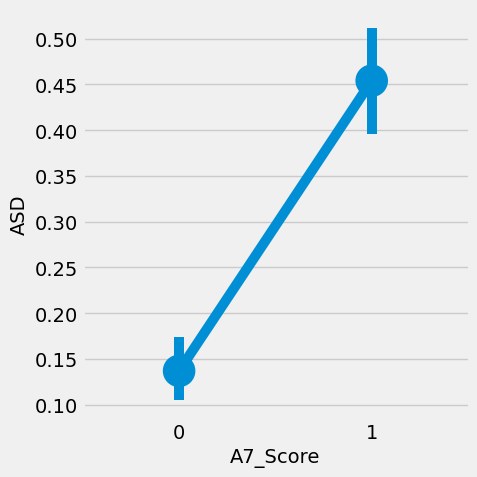

In [218]:
sns.catplot(x="A7_Score", y="ASD", data=data, kind='point')
plt.show()

In [219]:
pd.crosstab(data.A8_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A8_Score,,
0,214,31
1,299,158


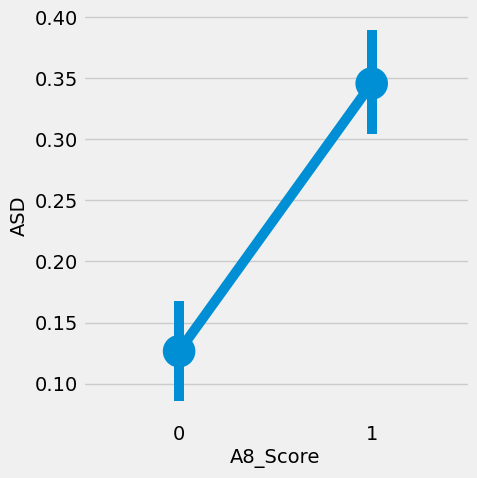

In [220]:
sns.catplot(x="A8_Score", y="ASD", data=data, kind='point')
plt.show()

In [221]:
pd.crosstab(data.A9_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0,1
A9_Score,,
0,439,35
1,74,154


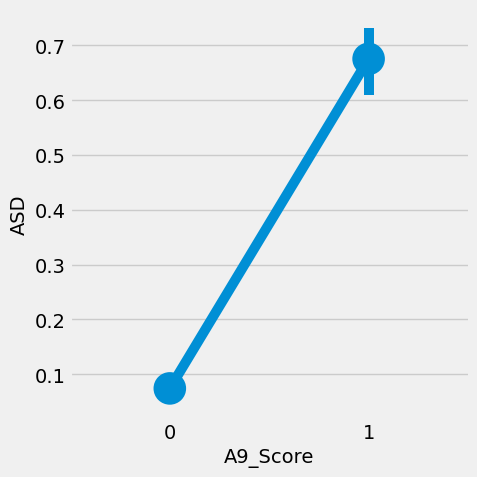

In [222]:
sns.catplot(x="A9_Score", y="ASD", data=data, kind='point')
plt.show()

In [235]:
pd.crosstab(data.A10_Score, data.ASD).style.background_gradient(cmap="summer_r")

ASD,0.000000,1.000000
A10_Score,,
0,278,21
1,235,168


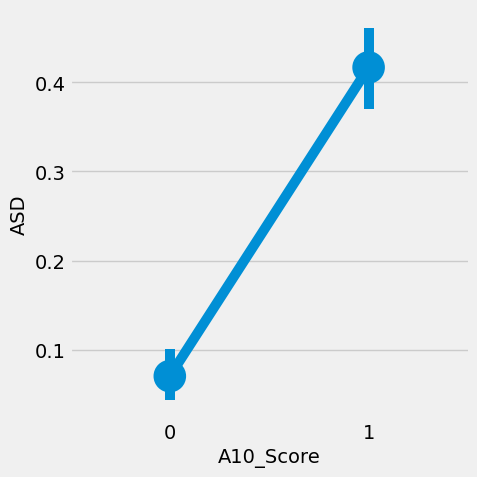

In [224]:
sns.catplot(x="A10_Score", y="ASD", data=data, kind='point')
plt.show()

Для всех десяти тестов при положительном ответе доля пациентов имеющих аутизм больше, чем здоровых.

In [227]:
data.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
gender             object
ethnicity          object
jundice            object
autism             object
country_of_res     object
used_app_before    object
result              int64
relation           object
ASD                object
age_group           int64
dtype: object

In [232]:
data['ASD']=data['ASD'].astype(float)

In [234]:
data.loc[data["jundice"]== 'no', "jundice"]=0
data.loc[data["jundice"]=='yes', "jundice"]=1
data['jundice']=data['jundice'].astype(float)

In [236]:
data.loc[data["autism"]== 'no', "autism"]=0
data.loc[data["autism"]=='yes', "autism"]=1
data['autism']=data['autism'].astype(float)

<Axes: >

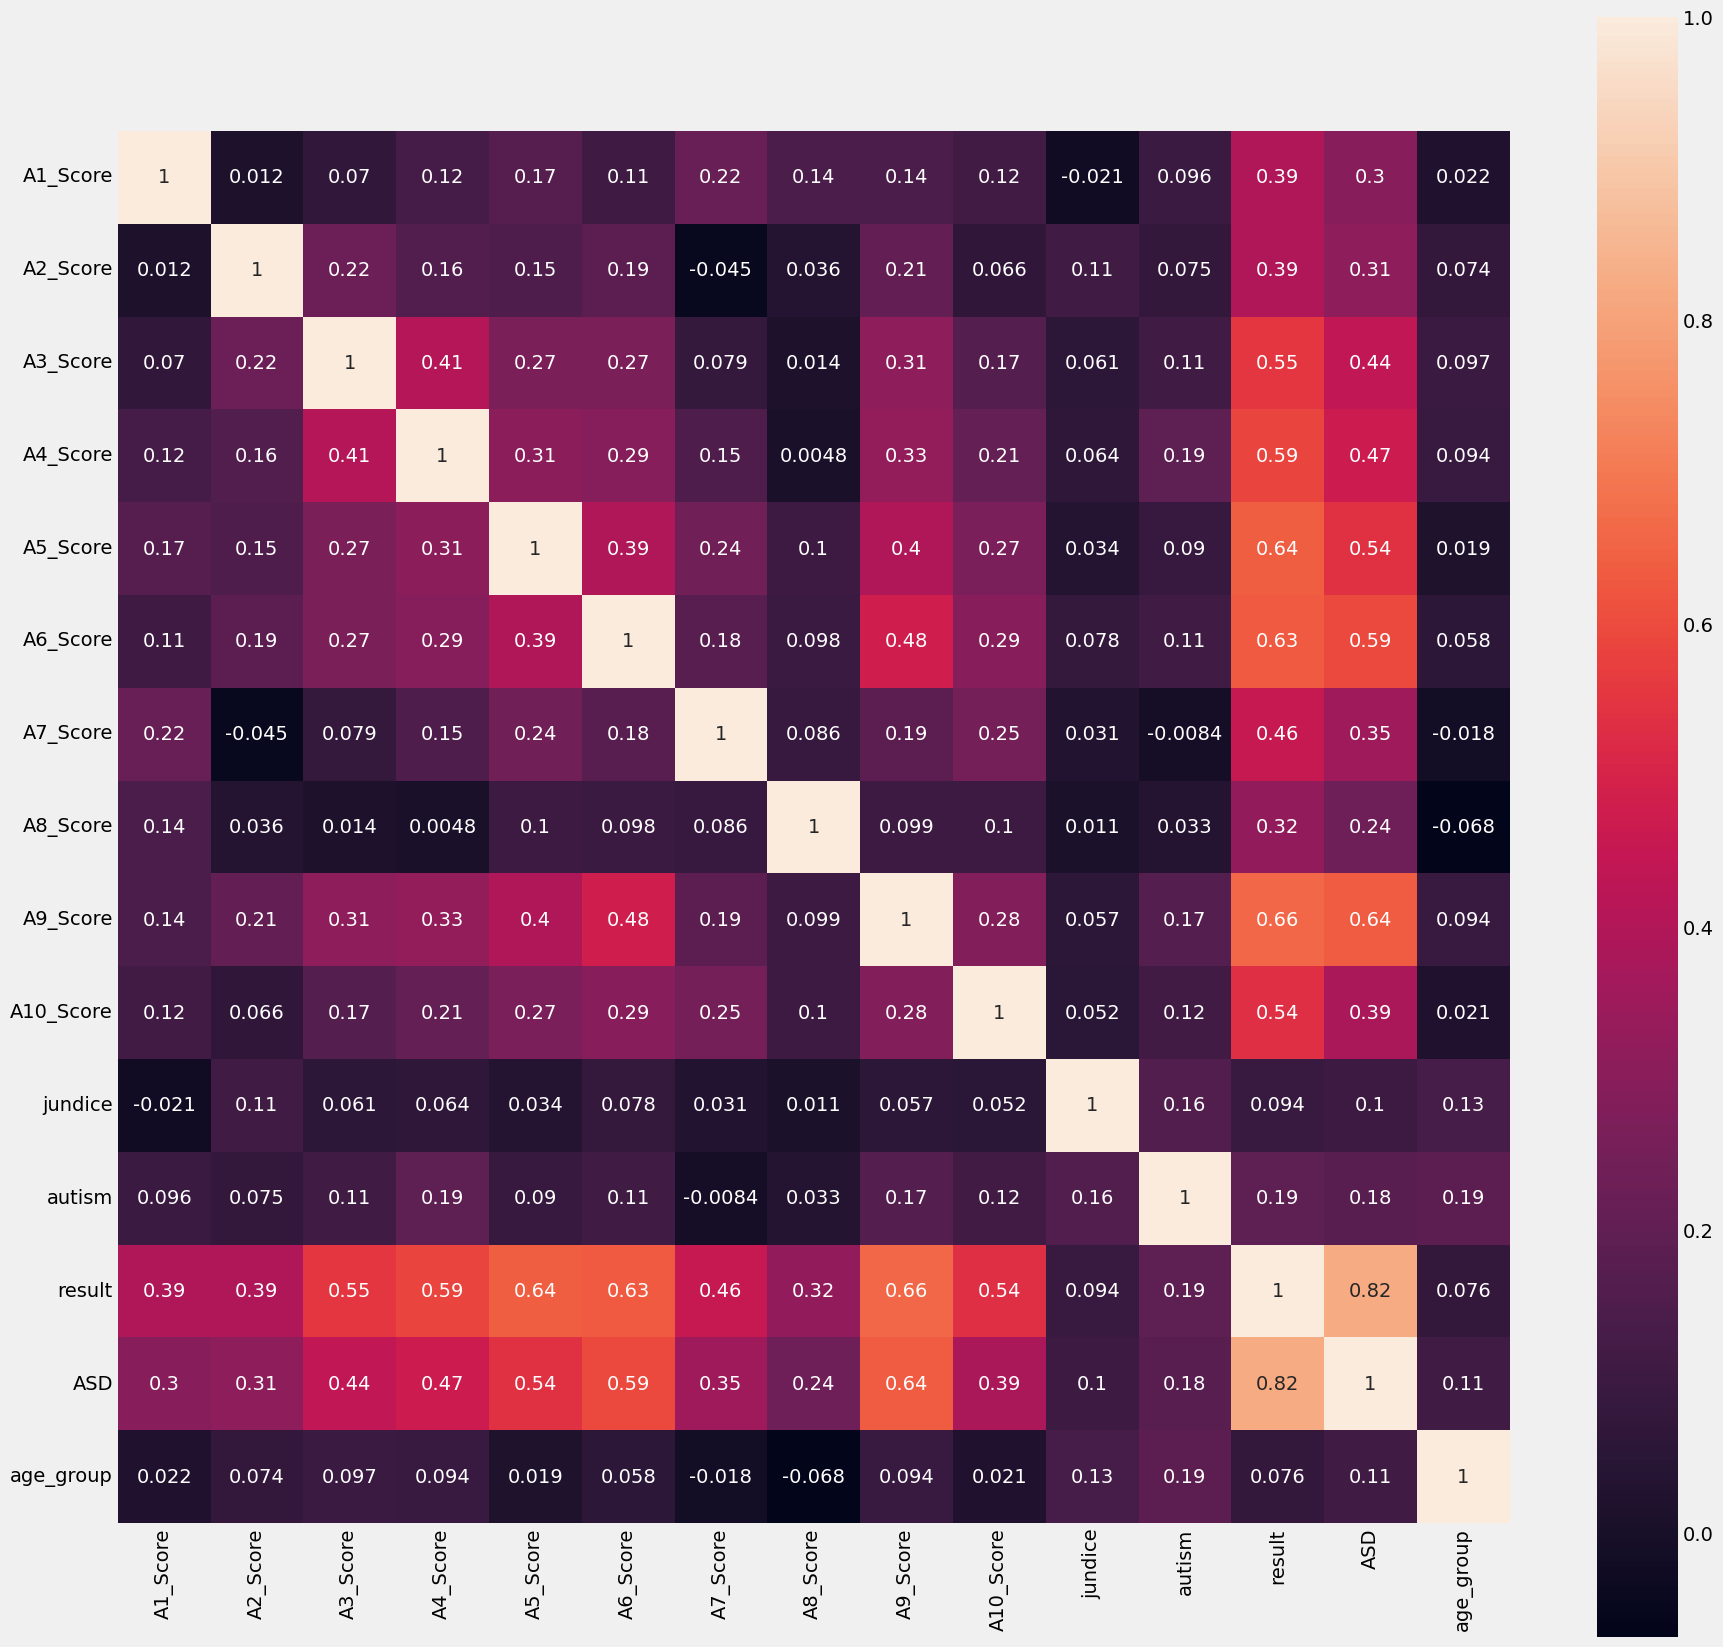

In [237]:
corr = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

Признак result имеет большую корреляцию с наличием аутизма, его не стоит испльзовать при обучения модели, стоит импользовать значения каждого теста.